In [1]:
# Loading the model
from keras.models import load_model
model = load_model('FCDenseNET_SE_Best.h5')

Using TensorFlow backend.


In [4]:
# loading Samples of the TGS data
import numpy as np

Data   = np.load('Samples_TGS_Data.npy')
Labels = np.load('Samples_TGS_Labels.npy')
print(np.shape(Data))

(50, 128, 128, 3)


In [7]:
# Predict the labels
preds_sig,preds_val = model.predict(Data, verbose=1,batch_size=16)
# Threshold predictions
preds_val_t = (preds_val > 0.5).astype(np.uint8)

50/50 [==============================] - 0s 3ms/step


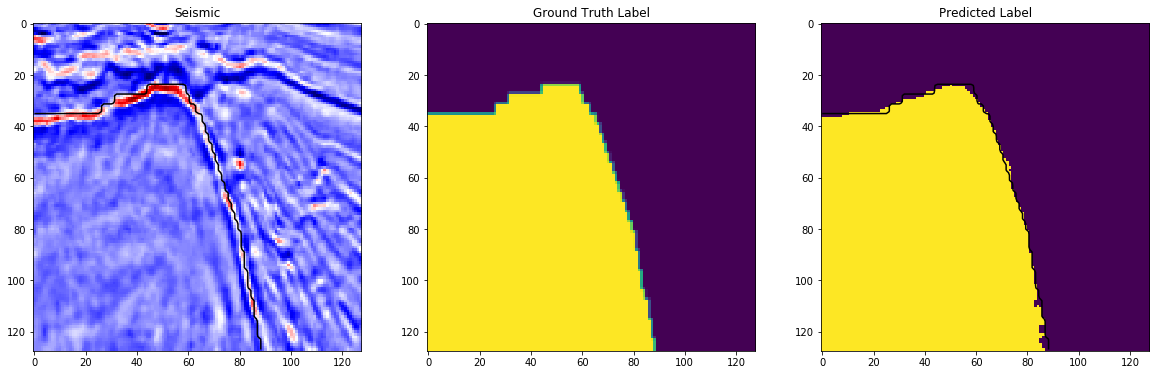

In [29]:
# Plot the data, Ground Truth Label, and The Predicted Labels
from matplotlib import pyplot as plt

X = Data
y = Labels
preds = preds_sig
binary_preds = preds_val_t
# Image number. Here, between 0-49.
ix=13

has_mask = y[ix].max() > 0

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
#X[ix, ..., 0] changes the dimensions of X please print it and see
ax[0].imshow(X[ix, ..., 0], cmap='seismic')
if has_mask:
    ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
ax[0].set_title('Seismic')

ax[1].imshow(y[ix].squeeze())
ax[1].set_title('Ground Truth Label')


ax[2].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1)
if has_mask:
    ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
ax[2].set_title('Predicted Label');